# DIEM_Stat Optimization

## Clone the GitHub Repository </br>
URL: https://github.com/ftessari23/DIEM/tree/main

In [ ]:
! git clone https://github.com/ftessari23/DIEM.git

Cloning into 'DIEM'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (85/85), done.
remote: Total 94 (delta 40), reused 12 (delta 5), pack-reused 0 (from 0)
Receiving objects: 100% (94/94), 642.05 KiB | 12.11 MiB/s, done.
Resolving deltas: 100% (40/40), done.


## System Information

#### Import necessary libraries

In [ ]:
import os
import psutil
import time

### System Information

In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


In [ ]:
!lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge m
                          ca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht sysc
                          all nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xt
                          opology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq
                           ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt
                           aes xsave avx f16c rdrand hypervisor 

In [ ]:
print("System Information:")
print(f"- CPU Count: {psutil.cpu_count(logical=False)} physical, {psutil.cpu_count()} logical")
print(f"- Total Memory: {psutil.virtual_memory().total / (1024**3):.2f} GB")

System Information:
- CPU Count: 1 physical, 2 logical
- Total Memory: 12.67 GB


## Benchmarking Existing Approach
The code is taken as it is from the cloned repository. </br>
<b>Note:</b> Plotting related code is commented to measure the latency more precisely

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.linalg import null_space

DIEM_Stat function

In [ ]:
def DIEM_Stat(N, maxV, minV):   # Removed 'fig_flag' parameter
    d = []
    dort = []

    for _ in range(int(1e5)):
        a = (maxV - minV) * np.random.rand(N, 1) + minV
        b = (maxV - minV) * np.random.rand(N, 1) + minV
        tmp = null_space(a.T)
        ort = tmp[:, 0].reshape(-1, 1)
        d.append(cdist(a.T, b.T, metric='euclidean')[0][0])
        dort.append(cdist(a.T, ort.T, metric='euclidean')[0][0])


    d = np.array(d)
    dort = np.array(dort)
    exp_center = np.median(d)
    vard = np.var(d)
    orth_med = (maxV - minV) * (np.median(dort) - exp_center) / vard
    adjusted_dist = (maxV - minV) * (d - exp_center) / vard
    std_one = np.std(adjusted_dist)
    min_DIEM = -(maxV - minV) * (exp_center / vard)
    max_DIEM = (maxV - minV) * (np.sqrt(N) * (maxV - minV) - exp_center) / vard

    return exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM

# Comment the plotting code to measure the latency more precisely
# if fig_flag == 1:
#     width = 10
#     x = np.arange(1, width + 1)
#     plt.figure(figsize=(6, 6))
#     plt.fill_between(x, -std_one, std_one, color='r', alpha=0.2)
#     plt.fill_between(x, -2 * std_one, 2 * std_one, color='r', alpha=0.2)
#     plt.fill_between(x, -3 * std_one, 3 * std_one, color='r', alpha=0.2)
#     plt.plot(x, np.zeros(width), 'k--', linewidth=1)
#     plt.plot(x, np.full(width, orth_med), 'k-.', linewidth=1)
#     plt.plot(x, np.full(width, min_DIEM), 'k-.', linewidth=1)
#     plt.plot(x, np.full(width, max_DIEM), 'k-.', linewidth=1)
#     plt.ylabel('DIEM')
#     plt.xticks([])
#     plt.box(False)
#     plt.show()

def getDIEM(synMat1, synMat2, maxV, minV, exp_center, vard, Plot='off', Text='off', TextSize=10):
    DIEM = (maxV - minV) * (cdist(synMat1.T, synMat2.T, metric='euclidean') - exp_center) / vard

    if np.allclose(DIEM, DIEM.T):
        DIEM = np.triu(DIEM)
        DIEM[DIEM == 0] = np.nan

    return DIEM #, ax

# Comment the plotting code to measure the latency more precisely
# ax = None
# if Plot.lower() == 'on':
#     ax = plotDIEM(DIEM, Text, TextSize, 1.1 * np.nanmin(DIEM), np.nanmax(DIEM))

In [ ]:
# Parameters
N = 12
minV = 0
maxV = 1
fig_flag = 1

In [ ]:
# Set no.of runs to 100
n_runs= 100

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  start_time= time.perf_counter()
  _ = DIEM_Stat(N, maxV, minV, fig_flag)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
# Display the latencies
print(latencies)

[7105.172168 7980.352317 7569.5368   7778.64777  8147.80446  7016.557637
 8074.601545 7536.742431 7602.086663 7984.9103   7086.040206 7984.804337
 7694.065226 7403.515624 8132.74873  7080.926378 8016.590237 7926.72644
 7159.138654 7969.484795 7062.654013 7991.582992 7990.793325 7010.195628
 8120.665267 7367.296138 8025.533804 8002.178146 7078.458041 7957.420258
 7077.658966 8159.761082 8377.043958 7213.348829 7991.518712 7746.78964
 7467.694366 8012.555505 7027.954229 8013.068077 7634.282375 7435.275789
 8064.226813 7062.577574 8041.185772 7917.978638 7312.800642 8063.542806
 7026.404268 8006.559109 8009.310437 7062.279556 7969.594553 7047.286705
 7997.037962 8002.55191  7189.72025  8089.604247 7018.275135 8037.318065
 8007.804631 7038.978434 7963.749002 7184.475379 7933.740946 8124.321109
 7045.888963 8201.870848 7461.110833 7608.596686 7997.802133 7066.686946
 7984.689092 7688.322942 7628.263664 8056.877067 7050.971939 8054.505685
 7963.934815 7211.304449 7985.889072 7082.625355 7994

In [ ]:
# Convert into pd.DataFrame
df= pd.DataFrame({"Before_Optimization_DIEM_Stat": latencies})
df.shape

(100, 1)

In [ ]:
df.describe()

,Before Optimization
count,100.000000
mean,7665.389095
std,428.563450
min,7010.195628
25%,7178.141198
50%,7930.233693
75%,8010.121704
max,8377.043958


In [ ]:
# Save the pd.DataFrame in '.csv' format
df.to_csv("/content/Before_Optimization_DIEM_Stat.csv", index= None)

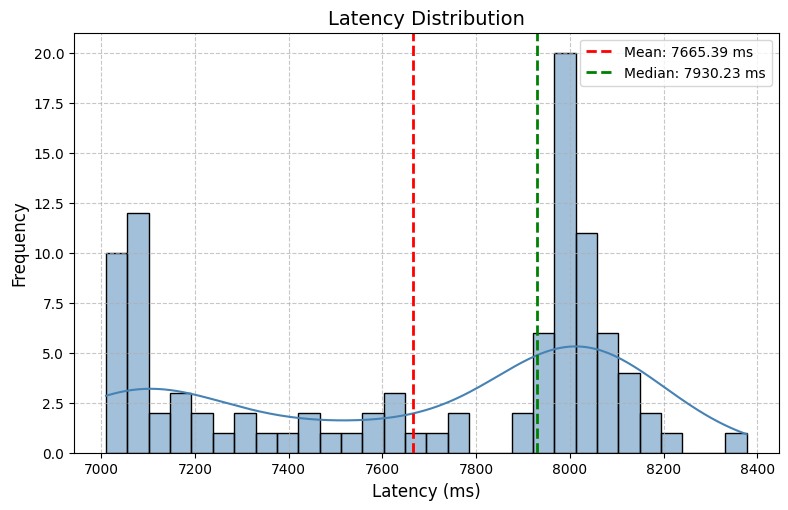

In [ ]:
# Create a figure with multiple plots
plt.figure(figsize=(20, 12))

# 1. Histogram with KDE
plt.subplot(2, 2, 1)
sns.histplot(latencies, kde=True, bins=30, color='steelblue')
plt.axvline(np.mean(latencies), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(latencies):.2f} ms')
plt.axvline(np.median(latencies), color='green', linestyle='dashed', linewidth=2, label=f'Median: {np.median(latencies):.2f} ms')
plt.title('Latency Distribution', fontsize=14)
plt.xlabel('Latency (ms)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

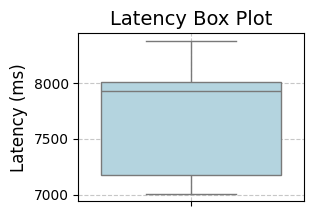

In [ ]:
# 2. Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(y=latencies, color='lightblue')
plt.title('Latency Box Plot', fontsize=14)
plt.ylabel('Latency (ms)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

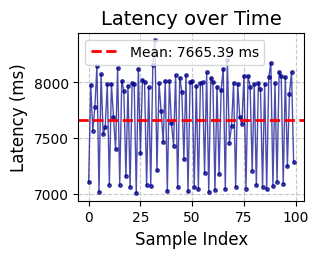

In [ ]:
# 3. Time Series Plot (assuming latencies are in chronological order)
plt.subplot(2, 2, 3)
plt.plot(range(len(latencies)), latencies, color='darkblue', marker='.', linestyle='-', linewidth=1, markersize=5, alpha=0.7)
plt.axhline(np.mean(latencies), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(latencies):.2f} ms')
plt.title('Latency over Time', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Latency (ms)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

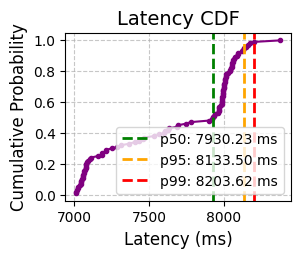

In [ ]:
plt.subplot(2, 2, 4)
x = np.sort(latencies)
y = np.arange(1, len(latencies) + 1) / len(latencies)
plt.plot(x, y, marker='.', linestyle='-', color='purple')
plt.axvline(np.percentile(latencies, 50), color='green', linestyle='dashed', linewidth=2, label=f'p50: {np.percentile(latencies, 50):.2f} ms')
plt.axvline(np.percentile(latencies, 95), color='orange', linestyle='dashed', linewidth=2, label=f'p95: {np.percentile(latencies, 95):.2f} ms')
plt.axvline(np.percentile(latencies, 99), color='red', linestyle='dashed', linewidth=2, label=f'p99: {np.percentile(latencies, 99):.2f} ms')
plt.title('Latency CDF', fontsize=14)
plt.xlabel('Latency (ms)', fontsize=12)
plt.ylabel('Cumulative Probability', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

In [ ]:

# Generate synthetic data
S1 = np.random.rand(N, 5) * (maxV - minV) + minV
S2 = np.random.rand(N, 5) * (maxV - minV) + minV

# Compute DIEM matrix
DIEM = getDIEM(S1, S2, maxV, minV, exp_center, vard, Plot='on', Text='on')

In [ ]:
DIEM

array([[ 5.66463208,  1.49140757,  2.70627866,  4.08311536,  4.76551555],
       [ 0.40976692,  9.05939139,  3.2243391 ,  7.9712622 ,  1.69602868],
       [-0.66037524,  0.71333504, -3.1247248 ,  2.44507459, -3.54975208],
       [-0.42162928,  4.7945022 , -3.01333323,  1.1522775 ,  4.24658784],
       [ 0.68612474, -0.72808863, -3.40350936, -2.23594916,  0.08212914]])

## Our Experiments on Latency Optimization

In [39]:
import time
import numpy as np
import numba as nb
from numba import jit, prange, njit
import pandas as pd
import scipy
from scipy.linalg import null_space
from scipy.linalg.blas import ddot
from scipy.spatial.distance import euclidean, cdist
from sympy import Matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
N = 12
minV = 0
maxV = 1

### Latency Experiment: Convert 2D array -> 1D array
Ex: [[1,2],[3,4]] -> [1,2,3,4]

#### Random Dataset Preparation

In [ ]:
value_range = maxV - minV
a= []

for i in range(int(1e5)):

  a.append( value_range* np.random.rand(N, 1) + minV )

a= np.array(a)

In [ ]:
df= pd.DataFrame( a[:, :, 0] )
df.shape

(100000, 12)

In [ ]:
df.to_csv("Array_Latency_Evaluation_Dataset.csv", index= None)

In [ ]:
len(a)

100000

In [ ]:
a.shape

(100000, 12, 1)

#### Flatten Latency

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  value = a[i]

  start_time= time.perf_counter()
  _ = value.flatten()
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"Flatten_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,Flatten_Latency
count,100000.000000
mean,0.001148
std,0.009197
min,0.000892
25%,0.000913
50%,0.000924
75%,0.000952
max,2.050114


In [ ]:
df.to_csv( r"/content/Flatten_Latency.csv", index= None )

#### Indexing Latency

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  value = a[i]

  start_time= time.perf_counter()
  _ = value[:,0]
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"Indexing_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,Indexing_Latency
count,100000.000000
mean,0.000395
std,0.000682
min,0.000344
25%,0.000360
50%,0.000371
75%,0.000387
max,0.147373


In [ ]:
df.to_csv( r"/content/Indexing_Latency.csv", index= None )

#### Ravel Latency

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  value = a[i]

  start_time= time.perf_counter()
  _ = value.ravel()
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"Ravel_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,Ravel_Latency
count,100000.000000
mean,0.000937
std,0.068089
min,0.000305
25%,0.000429
50%,0.000489
75%,0.000531
max,17.702811


In [ ]:
df.to_csv( r"/content/Ravel_Latency.csv", index= None )

#### Squeeze Latency

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  value= a[i]

  start_time= time.perf_counter()
  _ = np.squeeze(value)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"Squeeze_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,Squeeze_Latency
count,100000.000000
mean,0.000656
std,0.003410
min,0.000576
25%,0.000605
50%,0.000620
75%,0.000632
max,1.063223


In [ ]:
df.to_csv( r"/content/Squeeze_Latency.csv", index= None )

#### Display sample outputs using different approaches

In [ ]:
a[0]

array([[0.63569389],
       [0.58421263],
       [0.47041792],
       [0.23362089],
       [0.83894883],
       [0.28052324],
       [0.78584735],
       [0.65097724],
       [0.52338686],
       [0.75879576],
       [0.41574941],
       [0.60330231]])

In [ ]:
a[0].flatten()

array([0.63569389, 0.58421263, 0.47041792, 0.23362089, 0.83894883,
       0.28052324, 0.78584735, 0.65097724, 0.52338686, 0.75879576,
       0.41574941, 0.60330231])

In [ ]:
a[0][:,0]

array([0.63569389, 0.58421263, 0.47041792, 0.23362089, 0.83894883,
       0.28052324, 0.78584735, 0.65097724, 0.52338686, 0.75879576,
       0.41574941, 0.60330231])

In [ ]:
a[0].ravel()

array([0.63569389, 0.58421263, 0.47041792, 0.23362089, 0.83894883,
       0.28052324, 0.78584735, 0.65097724, 0.52338686, 0.75879576,
       0.41574941, 0.60330231])

In [ ]:
np.squeeze( a[0] )

array([0.63569389, 0.58421263, 0.47041792, 0.23362089, 0.83894883,
       0.28052324, 0.78584735, 0.65097724, 0.52338686, 0.75879576,
       0.41574941, 0.60330231])

#### Compare different approaches used to convert 2D -> 1D array

In [ ]:
df= pd.read_csv( r"/content/Flatten_Latency.csv" )
df["Indexing_Latency"]= pd.read_csv( r"/content/Indexing_Latency.csv" )
df["Ravel_Latency"]= pd.read_csv( r"/content/Ravel_Latency.csv" )
df["Squeeze_Latency"]= pd.read_csv( r"/content/Squeeze_Latency.csv" )
df.head( 5 )

,Flatten_Latency,Indexing_Latency,Ravel_Latency,Squeeze_Latency
0,0.032786,0.002780,0.008857,0.010982
1,0.041432,0.000869,0.001331,0.001466
2,0.005235,0.000515,0.000744,0.000862
3,0.001825,0.000434,0.000494,0.000658
4,0.002031,0.000444,0.000566,0.000695


In [ ]:
df.describe()

,Flatten_Latency,Indexing_Latency,Ravel_Latency,Squeeze_Latency
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.001148,0.000395,0.000937,0.000656
std,0.009197,0.000682,0.068089,0.003410
min,0.000892,0.000344,0.000305,0.000576
25%,0.000913,0.000360,0.000429,0.000605
50%,0.000924,0.000371,0.000489,0.000620
75%,0.000952,0.000387,0.000531,0.000632
max,2.050114,0.147373,17.702811,1.063223


#### Conclusion:
From the above experiments, it is found to be evident that,
mean, standard deviation, and maximum value in 'Indexing_Latency' are lesser than all other approaches experimented here.
</br>
Therefore, **Indexing_Latency** approach can be cosidered as the most appropriate.

### Euclidean Distance Experiment
Reference: https://stackoverflow.com/questions/1401712/how-can-the-euclidean-distance-be-calculated-with-numpy
https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/

#### Random Dataset Preparation

In [ ]:
a= []
b= []

value_range = maxV - minV

for i in range(int(1e5)):

  a.append( value_range* np.random.rand(N, 1) + minV )
  b.append( value_range * np.random.rand(N, 1) + minV )

a= np.array( a )
b= np.array( b )

In [ ]:
pd.DataFrame( a[:, :, 0] ).to_csv( "/content/Euclidean_Latency_Evaluation_a.csv", index= None )
pd.DataFrame( b[:, :, 0] ).to_csv( "/content/Euclidean_Latency_Evaluation_b.csv", index= None )

#### scipy.spatial.distance.euclidean

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  _ = euclidean( temp_a, temp_b )
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"scipy_spatial_distance_euclidean_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,scipy_spatial_distance_euclidean_Latency
count,100000.000000
mean,0.011587
std,0.154131
min,0.005150
25%,0.005598
50%,0.009007
75%,0.009527
max,16.432232


In [ ]:
df.to_csv( r"/content/scipy_spatial_distance_euclidean_Latency.csv", index= None )

#### scipy.spatial.distance.cdist

In [64]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i]
  temp_b = b[i]

  start_time= time.perf_counter()
  _ = cdist(temp_a.T, temp_b.T, metric='euclidean')
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [65]:
df= pd.DataFrame( {"scipy_spatial_distance_cdist_euclidean_Latency": latencies} )
df.shape

(100000, 1)

In [66]:
df.describe()

,scipy_spatial_distance_cdist_euclidean_Latency
count,100000.000000
mean,0.004207
std,0.008414
min,0.003254
25%,0.003428
50%,0.003483
75%,0.003619
max,1.572133


In [67]:
df.to_csv( r"/content/scipy_spatial_distance_cdist_euclidean_Latency.csv", index= None )

#### np.linalg.norm

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  _ = np.linalg.norm( temp_a - temp_b )
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"np_linalg_norm_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,np_linalg_norm_Latency
count,100000.000000
mean,0.006629
std,0.023535
min,0.002975
25%,0.005733
50%,0.005882
75%,0.006122
max,3.400376


In [ ]:
df.to_csv( r"/content/np_linalg_norm_Latency.csv", index= None )

#### numba.jit

In [75]:
@jit(fastmath=True, parallel=True, nopython= True)
def euclidean_distance_numba(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  _ = euclidean_distance_numba( temp_a, temp_b )
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"numba_euclidean_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,numba_euclidean_Latency
count,100000.000000
mean,0.034711
std,7.784834
min,0.003236
25%,0.009511
50%,0.009637
75%,0.009833
max,2461.788567


In [ ]:
df.to_csv( r"/content/numba_jit_Latency.csv", index= None)

#### numba.jit manual euclidean

In [ ]:
@jit
def euclidean_distance_numba_manual(a, b):
    result= 0.0
    for i in prange(len(a)):
        diff= a[i] - b[i]
        result+= diff * diff
    return np.sqrt(result)

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  _ = euclidean_distance_numba_manual( temp_a, temp_b )
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"numba_jit_manual_euclidean_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,numba_jit_manual_euclidean_Latency
count,100000.000000
mean,0.001777
std,0.336194
min,0.000599
25%,0.000639
50%,0.000654
75%,0.000678
max,106.301776


In [ ]:
df.to_csv( r"/content/numba_jit_manual_euclidean_Latency.csv", index= None)

#### np.dot

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  x= temp_a- temp_b
  _ = np.sqrt(np.dot(x, x))
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"np_dot_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,np_dot_Latency
count,100000.000000
mean,0.003079
std,0.006427
min,0.002497
25%,0.002656
50%,0.002692
75%,0.002742
max,1.433559


In [ ]:
df.to_csv( r"/content/np_dot_Latency.csv", index= None)

#### np.einsum

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  x= temp_a- temp_b
  _ = np.sqrt(np.einsum('i,i->', x, x))
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"np_einsum_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,np_einsum_Latency
count,100000.000000
mean,0.004873
std,0.006753
min,0.004274
25%,0.004454
50%,0.004504
75%,0.004572
max,1.400327


In [ ]:
df.to_csv( r"/content/np_einsum_Latency.csv", index= None)

#### np.sqrt np.sum

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  _ = np.sqrt(np.sum((temp_a- temp_b)**2))
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"np_sqrt_sum_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,np_sqrt_sum_Latency
count,100000.000000
mean,0.006413
std,0.006823
min,0.005670
25%,0.005925
50%,0.005990
75%,0.006080
max,1.456009


In [ ]:
df.to_csv( r"/content/np_sqrt_sum_Latency.csv", index= None)

#### scipy.linalg.ddot

In [ ]:
value_range = maxV - minV
latencies= []

for i in range(int(1e5)):

  temp_a = a[i][:, 0]
  temp_b = b[i][:, 0]

  start_time= time.perf_counter()
  difference= temp_a - temp_b
  _ = np.sqrt(ddot(difference, difference))
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"scipy_linalg_ddot_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,scipy_linalg_ddot_Latency
count,100000.000000
mean,0.002337
std,0.011813
min,0.001893
25%,0.001969
50%,0.001996
75%,0.002045
max,2.795049


In [ ]:
df.to_csv( r"/content/scipy_linalg_ddot_Latency.csv", index= None)

#### Display sample outputs using different approaches

In [68]:
temp_a= a[0][:, 0]
temp_b= b[0][:, 0]
temp_a, temp_b

(array([0.09700631, 0.79292087, 0.46856237, 0.46176294, 0.73626686,
        0.87977479, 0.69870411, 0.60962625, 0.50281549, 0.98872956,
        0.66137175, 0.0305957 ]),
 array([0.2377809 , 0.45076354, 0.1359368 , 0.82002755, 0.30912014,
        0.93566558, 0.20712756, 0.76864787, 0.34977816, 0.52245671,
        0.31798228, 0.35176779]))

In [69]:
x= a[0][:, 0]-b[0][:, 0]
x

array([-0.1407746 ,  0.34215733,  0.33262557, -0.35826461,  0.42714671,
       -0.05589079,  0.49157655, -0.15902162,  0.15303733,  0.46627285,
        0.34338947, -0.32117209])

In [70]:
euclidean( temp_a, temp_b )

1.1359113236397305

In [72]:
cdist(a[0].T, b[0].T, metric='euclidean')

array([[1.13591132]])

In [73]:
np.linalg.norm( temp_a - temp_b )

np.float64(1.1359113236397305)

In [76]:
euclidean_distance_numba( temp_a, temp_b )

1.1359113236397305

In [ ]:
euclidean_distance_numba_manual( temp_a, temp_b )

1.1359113236397305

In [ ]:
np.sqrt(np.dot(x, x))

np.float64(1.1359113236397305)

In [ ]:
np.sqrt(np.einsum('i,i->', x, x))

np.float64(1.1359113236397305)

In [ ]:
np.sqrt(np.sum((temp_a- temp_b)**2))

np.float64(1.1359113236397305)

In [ ]:
np.sqrt(ddot(x, x))

np.float64(1.1359113236397305)

#### Compare different approaches used

In [78]:
df= pd.read_csv( r"/content/scipy_spatial_distance_euclidean_Latency.csv" )
df["scipy_spatial_distance_cdist_euclidean_Latency"]= pd.read_csv( r"/content/scipy_spatial_distance_cdist_euclidean_Latency.csv" )
df["np_linalg_norm_Latency"]= pd.read_csv( r"/content/np_linalg_norm_Latency.csv" )
df["numba_jit_Latency"]= pd.read_csv( r"/content/numba_jit_Latency.csv" )
df["numba_jit_manual_euclidean_Latency"]= pd.read_csv( r"/content/numba_jit_manual_euclidean_Latency.csv" )
df["np_dot_Latency"]= pd.read_csv( r"/content/np_dot_Latency.csv" )
df["np_einsum_Latency"]= pd.read_csv( r"/content/np_einsum_Latency.csv" )
df["np_sqrt_sum_Latency"]= pd.read_csv( r"/content/np_sqrt_sum_Latency.csv" )
df["scipy_linalg_ddot_Latency"]= pd.read_csv( r"/content/scipy_linalg_ddot_Latency.csv" )
df.head(5)

,scipy_spatial_distance_euclidean_Latency,scipy_spatial_distance_cdist_euclidean_Latency,np_linalg_norm_Latency,numba_jit_Latency,numba_jit_manual_euclidean_Latency,np_dot_Latency,np_einsum_Latency,np_sqrt_sum_Latency,scipy_linalg_ddot_Latency
0,0.123771,0.517317,0.106118,2461.788567,106.301776,0.068447,0.086901,0.097213,0.067073
1,0.018047,0.741610,0.016852,0.052668,0.003099,0.024406,0.008864,0.011203,0.004820
2,0.012733,0.032415,0.010006,0.010538,0.001281,0.007755,0.005390,0.007560,0.002707
3,0.015267,0.008586,0.014446,0.008263,0.000751,0.008583,0.005029,0.006529,0.002221
4,0.015576,0.006536,0.025480,0.010695,0.000659,0.009864,0.004780,0.006325,0.002123


In [79]:
df.describe()

,scipy_spatial_distance_euclidean_Latency,scipy_spatial_distance_cdist_euclidean_Latency,np_linalg_norm_Latency,numba_jit_Latency,numba_jit_manual_euclidean_Latency,np_dot_Latency,np_einsum_Latency,np_sqrt_sum_Latency,scipy_linalg_ddot_Latency
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.011587,0.004207,0.006629,0.034711,0.001777,0.003079,0.004873,0.006413,0.002337
std,0.154131,0.008414,0.023535,7.784834,0.336194,0.006427,0.006753,0.006823,0.011813
min,0.005150,0.003254,0.002975,0.003236,0.000599,0.002497,0.004274,0.005670,0.001893
25%,0.005598,0.003428,0.005733,0.009511,0.000639,0.002656,0.004454,0.005925,0.001969
50%,0.009007,0.003483,0.005882,0.009637,0.000654,0.002692,0.004504,0.005990,0.001996
75%,0.009527,0.003619,0.006122,0.009833,0.000678,0.002742,0.004572,0.006080,0.002045
max,16.432232,1.572133,3.400376,2461.788567,106.301776,1.433559,1.400327,1.456009,2.795049


#### Conclusion:
From the above experiment, it is observed that 'np_dot_Latency' is having comparatively lower mean, standard deviation.

Therefore, **np_dot_Latency** can be the most appropriate to find euclidean distance between given two vector embeddings.

### Null Space Experiment

#### Random Dataset Generation

In [ ]:
value_range = maxV - minV
a= []

for i in range(int(1e5)):

  element= value_range* np.random.rand(N, 1) + minV
  a.append( element.T )

a= np.array(a)

In [ ]:
a[:, 0, :].shape

(100000, 12)

In [ ]:
pd.DataFrame( a[:, 0, :] ).to_csv( "/content/Null_Space_Latency_Evaluation_Dataset.csv", index= None )

#### scipy.linalg.null_space

In [ ]:
latencies= []

for i in range(int(1e5)):

  value = a[i]

  start_time= time.perf_counter()
  _ = null_space( value )
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"scipy_linalg_null_space_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,scipy_linalg_null_space_Latency
count,100000.000000
mean,0.060842
std,0.304633
min,0.033793
25%,0.035425
50%,0.043032
75%,0.059585
max,29.280350


In [ ]:
df.to_csv( "/content/scipy_linalg_null_space_Latency.csv", index= None )

#### numpy_manual_null_space
https://stackoverflow.com/questions/5889142/finding-the-null-space-of-a-matrix

In [ ]:
a[0].shape

(1, 12)

In [ ]:
u, s, vh= np.linalg.svd(a[0], full_matrices=True)
u.shape, s.shape, vh.shape

((1, 1), (1,), (12, 12))

In [ ]:
s.dtype

dtype('float64')

As input vector 'value' is of fixed shape (1, N),
</br>
1.  u.shape[0] is always '1' (here, as we are processing each vector at a time)
2. By using Identity Property: x.1= 1.x= x ∀ x∈ℝ where '.' is standard scalar multiplication in Real Number System
3. ```vh.shape[1]``` is the dimension of input embedding, 'N'

The following code:
</br>
```vh[np.sum(s > np.amax(s) * np.finfo(s.dtype).eps * max(u.shape[0], vh.shape[1]), dtype=int):,:].T.conj()```
</br>
can be re-written as: </br>
```vh[np.sum(s > np.amax(s) * np.finfo(s.dtype).eps * N, dtype=int):,:].T.conj()``` </br>

In [ ]:
latencies= []
rcond= None

for i in range(int(1e5)):

  value = a[i]

  start_time= time.perf_counter()
  u, s, vh = np.linalg.svd(value, full_matrices=True)
  _= vh[np.sum(s > np.amax(s) * np.finfo(s.dtype).eps * N, dtype=int):,:].T.conj()
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [ ]:
df= pd.DataFrame( {"numpy_null_space_Latency": latencies} )
df.shape

(100000, 1)

In [ ]:
df.describe()

,numpy_null_space_Latency
count,100000.000000
mean,0.034598
std,0.037062
min,0.026956
25%,0.028385
50%,0.031270
75%,0.033737
max,9.895797


In [ ]:
df.to_csv( "/content/numpy_manual_null_space_Latency.csv", index= None )

#### Display sample outputs using different approaches

In [ ]:
null_space(a[0])

array([[-0.11036203, -0.34416036, -0.32731635, -0.16924703, -0.35144669,
        -0.15416047, -0.39040396, -0.0798761 , -0.31569022, -0.38101069,
        -0.40028732],
       [ 0.98940761, -0.03303203, -0.03141536, -0.01624409, -0.03373136,
        -0.01479611, -0.03747042, -0.0076664 , -0.0302995 , -0.03656887,
        -0.03841902],
       [-0.03303203,  0.8969907 , -0.09796778, -0.05065667, -0.10519014,
        -0.04614117, -0.11685029, -0.0239074 , -0.09448801, -0.11403883,
        -0.11980844],
       [-0.03141536, -0.09796778,  0.90682699, -0.04817741, -0.10004189,
        -0.04388291, -0.11113136, -0.02273732, -0.08986355, -0.1084575 ,
        -0.11394474],
       [-0.01624409, -0.05065667, -0.04817741,  0.97508867, -0.05172914,
        -0.02269075, -0.05746322, -0.01175689, -0.04646617, -0.05608064,
        -0.05891795],
       [-0.03373136, -0.10519014, -0.10004189, -0.05172914,  0.89258285,
        -0.04711804, -0.11932416, -0.02441355, -0.09648845, -0.11645318,
        -0.122

In [ ]:
u, s, vh = np.linalg.svd(a[0], full_matrices=True)
vh[np.sum(s > np.amax(s) * np.finfo(s.dtype).eps * N, dtype=int):,:].T.conj()

array([[-0.11036203, -0.34416036, -0.32731635, -0.16924703, -0.35144669,
        -0.15416047, -0.39040396, -0.0798761 , -0.31569022, -0.38101069,
        -0.40028732],
       [ 0.98940761, -0.03303203, -0.03141536, -0.01624409, -0.03373136,
        -0.01479611, -0.03747042, -0.0076664 , -0.0302995 , -0.03656887,
        -0.03841902],
       [-0.03303203,  0.8969907 , -0.09796778, -0.05065667, -0.10519014,
        -0.04614117, -0.11685029, -0.0239074 , -0.09448801, -0.11403883,
        -0.11980844],
       [-0.03141536, -0.09796778,  0.90682699, -0.04817741, -0.10004189,
        -0.04388291, -0.11113136, -0.02273732, -0.08986355, -0.1084575 ,
        -0.11394474],
       [-0.01624409, -0.05065667, -0.04817741,  0.97508867, -0.05172914,
        -0.02269075, -0.05746322, -0.01175689, -0.04646617, -0.05608064,
        -0.05891795],
       [-0.03373136, -0.10519014, -0.10004189, -0.05172914,  0.89258285,
        -0.04711804, -0.11932416, -0.02441355, -0.09648845, -0.11645318,
        -0.122

#### Compare different approaches used

In [ ]:
df= pd.read_csv( r"/content/scipy_linalg_null_space_Latency.csv" )
df["numpy_manual_null_space_Latency"]= pd.read_csv( r"/content/numpy_manual_null_space_Latency.csv" )
df.head(5)

,scipy_linalg_null_space_Latency,numpy_manual_null_space_Latency
0,0.315961,0.321889
1,0.097415,0.054280
2,0.070647,0.037778
3,0.063831,0.033687
4,0.091143,0.031981


In [ ]:
df.describe()

,scipy_linalg_null_space_Latency,numpy_manual_null_space_Latency
count,100000.000000,100000.000000
mean,0.060842,0.034598
std,0.304633,0.037062
min,0.033793,0.026956
25%,0.035425,0.028385
50%,0.043032,0.031270
75%,0.059585,0.033737
max,29.280350,9.895797


#### Conclusion:
Mean, standard_deviation, and maximum value of numpy_manual_null_space_Latency is lesser than scipy_linalg_null_space_Latency.
</br>
Therefore, **numpy_manual_null_space_Latency** is considered as the most appropriate approach.

## Proposed Approach

In [ ]:
# Parameters
N = 12
minV = 0
maxV = 1
n_iter= int(1e5)

#### Partial Vectorized DIEM_Stat

In [98]:
def partial_vectorized_DIEM_Stat(N, maxV, minV, n_iter= int(1e5)):

  d = np.empty(n_iter)
  dort = np.empty(n_iter)

  range_factor= maxV - minV

  a = range_factor * np.random.rand(n_iter, N, 1) + minV
  b = range_factor * np.random.rand(n_iter, N, 1) + minV

  difference= a[:, :, 0] - b[:, :, 0]

  for iteration in range(n_iter):
      temp_a = a[iteration]
      temp_b = b[iteration]

      u, s, vh = np.linalg.svd(temp_a.T, full_matrices=True)
      tmp= vh[np.sum(s > np.amax(s) * np.finfo(s.dtype).eps * N, dtype=int):,:].T.conj()

      d[i]= np.sqrt(np.dot(difference[iteration], difference[iteration]))

      x= temp_a[:, 0]-tmp[:, 0].reshape(-1, 1)[:, 0]
      dort[i]= np.sqrt(np.dot(x, x))

  exp_center = np.median(d)
  vard = np.var(d)

  rv_factor= range_factor/ vard

  return {"exp_center": exp_center, "vard": vard, "std_one": np.std(rv_factor * (d - exp_center)),
          "orth_med": rv_factor * (np.median(dort) - exp_center),
          "min_DIEM": -(rv_factor * exp_center),
          "max_DIEM": rv_factor * (np.sqrt(N) * range_factor - exp_center)
        }

In [99]:
# Set no.of runs to 100
n_runs= 100

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  start_time= time.perf_counter()
  _ = partial_vectorized_DIEM_Stat(N, maxV, minV)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [100]:
df= pd.DataFrame( {"partial_vectorized_DIEM_Stats": latencies} )
df.shape

(100, 1)

In [101]:
df.describe()

,partial_vectorized_DIEM_Stats
count,100.000000
mean,5392.379373
std,467.138346
min,4768.921928
25%,5030.973761
50%,5313.467916
75%,5720.544662
max,7857.099138


In [102]:
df.to_csv( r"partial_vectorized_DIEM_Stats.csv", index= None )

#### Optimized Vectorized DIEM_Stat

In [103]:
def vectorized_DIEM_Stat(N, maxV, minV, n_iter= int(1e5)):

  range_factor= maxV - minV

  a = range_factor * np.random.rand(n_iter, N, 1) + minV
  b = range_factor * np.random.rand(n_iter, N, 1) + minV

  difference= a[:, :, 0] - b[:, :, 0]

  tmp= [
      ( lambda svd_out: svd_out[2][np.sum(svd_out[1] > np.amax(svd_out[1]) * np.finfo(svd_out[1].dtype).eps * N, dtype=int):,:].T.conj() )(np.linalg.svd(a[iteration].T, full_matrices=True))
          for iteration in range(n_iter)
      ]

  d= np.sqrt(np.sum(difference ** 2, axis=1))

  dort= [(lambda x: np.sqrt(np.dot(x, x)))(a[iteration][:, 0]-tmp[iteration][:, 0].reshape(-1, 1)[:, 0]) for iteration in range(n_iter)]

  exp_center = np.median(d)
  vard = np.var(d)

  rv_factor= range_factor/ vard

  return {"exp_center": exp_center, "vard": vard, "std_one": np.std(rv_factor * (d - exp_center)),
          "orth_med": rv_factor * (np.median(dort) - exp_center),
          "min_DIEM": -(rv_factor * exp_center),
          "max_DIEM": rv_factor * (np.sqrt(N) * range_factor - exp_center)
        }

In [104]:
# Set no.of runs to 100
n_runs= 100

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  start_time= time.perf_counter()
  _ = vectorized_DIEM_Stat(N, maxV, minV)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [105]:
df= pd.DataFrame( {"vectorized_DIEM_Stats": latencies} )
df.shape

(100, 1)

In [107]:
df.describe()

,vectorized_DIEM_Stats
count,100.000000
mean,4172.085226
std,446.877572
min,3639.404208
25%,3798.060130
50%,3999.286370
75%,4503.427546
max,5335.480873


In [108]:
df.to_csv( r"optimized_vectorized_DIEM_Stats.csv", index= None )

#### Compact Vectorized DIEM_Stat

In [80]:
def compact_vectorized_DIEM_Stat(N, maxV, minV, n_iter= int(1e5)):

  range_factor = maxV - minV

  a, b = range_factor * np.random.rand(n_iter, N, 1) + minV, range_factor * np.random.rand(n_iter, N, 1) + minV

  difference= a[:, :, 0] - b[:, :, 0]

  tmp, d= [
      ( lambda svd_out: svd_out[2][np.sum(svd_out[1] > np.amax(svd_out[1]) * np.finfo(svd_out[1].dtype).eps * N, dtype=int):,:].T.conj() )(np.linalg.svd(a[iteration].T, full_matrices=True))
          for iteration in range(n_iter)
      ], np.sqrt(np.sum(difference ** 2, axis=1))

  dort, exp_center, vard= [(lambda x: np.sqrt(np.dot(x, x)))(a[iteration][:, 0]-tmp[iteration][:, 0].reshape(-1, 1)[:, 0]) for iteration in range(n_iter)], np.median(d), np.var(d)

  rv_factor= range_factor/ vard

  return {"exp_center": exp_center, "vard": vard, "std_one": np.std(rv_factor * (d - exp_center)),
          "orth_med": rv_factor * (np.median(dort) - exp_center),
          "min_DIEM": -(rv_factor * exp_center),
          "max_DIEM": rv_factor * (np.sqrt(N) * range_factor - exp_center)
        }

In [85]:
# Set no.of runs to 100
n_runs= 100

latencies= []

for i in range(n_runs):

  # Compute DIEM stats
  # exp_center, vard, std_one, orth_med, min_DIEM, max_DIEM = DIEM_Stat(N, maxV, minV, fig_flag)

  start_time= time.perf_counter()
  _ = compact_vectorized_DIEM_Stat(N, maxV, minV)
  end_time= time.perf_counter()

  latency_ms = (end_time - start_time) * 1000  # Convert to milliseconds
  latencies.append(latency_ms)

In [86]:
df= pd.DataFrame( {"compact_vectorized_DIEM_Stat": latencies} )
df.shape

(100, 1)

In [87]:
df.describe()

,compact_vectorized_DIEM_Stat
count,100.000000
mean,4101.235106
std,455.990421
min,3622.866833
25%,3741.239411
50%,3866.087492
75%,4487.753374
max,5080.919175


In [88]:
df.to_csv( r"compact_vectorized_DIEM_Stats.csv", index= None )

## Comparision of Results

In [109]:
df= pd.read_csv( "/content/Before_Optimization_DIEM_Stat.csv" )
df["Partial Vectorization"]= pd.read_csv( r"/content/partial_vectorized_DIEM_Stats.csv" )
df["Optimized Vectorization"]= pd.read_csv( r"/content/vectorized_DIEM_Stats.csv" )
df["Compact Vectorization"]= pd.read_csv( r"/content/compact_vectorized_DIEM_Stats.csv" )
df.head( 5 )

,Before Optimization,Partial Vectorization,Optimized Vectorization,Compact Vectorization
0,7105.172168,7857.099138,3824.798655,3871.012008
1,7980.352317,5848.119258,4932.414310,3756.063340
2,7569.536800,5155.846252,3796.121702,4479.885756
3,7778.647770,5926.838346,3809.553142,4020.169826
4,8147.804460,5431.135826,4942.676653,3622.866833


In [110]:
df.describe()

,Before Optimization,Partial Vectorization,Optimized Vectorization,Compact Vectorization
count,100.000000,100.000000,100.000000,100.000000
mean,7665.389095,5392.379373,4172.085226,4101.235106
std,428.563450,467.138346,446.877572,455.990421
min,7010.195628,4768.921928,3639.404208,3622.866833
25%,7178.141198,5030.973761,3798.060130,3741.239411
50%,7930.233693,5313.467916,3999.286370,3866.087492
75%,8010.121704,5720.544662,4503.427546,4487.753374
max,8377.043958,7857.099138,5335.480873,5080.919175


In [112]:
def calc_improvement(df, to_compare, compare_with= "Before Optimization"):
  description= df.describe()
  return (100*(description[compare_with]- description[to_compare])/ description[compare_with]).loc[ ["mean", "std", "min", "max"] ]

In [113]:
improvement_df= pd.DataFrame()
improvement_df["Partial Vectorization"]= calc_improvement(df= df, to_compare= "Partial Vectorization" )
improvement_df["Optimized Vectorization"]= calc_improvement(df= df, to_compare= "Optimized Vectorization" )
improvement_df["Compact Vectorization"]= calc_improvement(df= df, to_compare= "Compact Vectorization" )

In [114]:
print( "Latency Comparision: Existing vs. Proposed" )
improvement_df

Latency Comparision: Existing vs. Proposed


,Partial Vectorization,Optimized Vectorization,Compact Vectorization
mean,29.652894,45.572427,46.496713
std,-9.000977,-4.273375,-6.399746
min,31.971628,48.084128,48.320032
max,6.206782,36.308310,39.347111


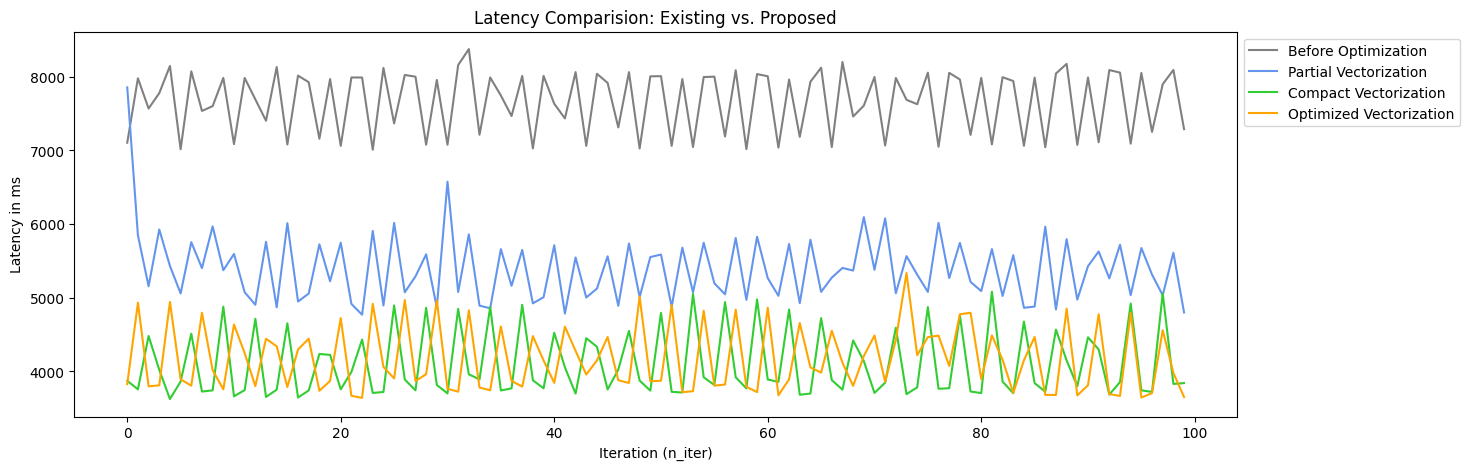

In [126]:
plt.figure( figsize= (15, 5) )

plt.plot( df["Before Optimization"], color= "gray", label= "Before Optimization" )
plt.plot( df["Partial Vectorization"], color= "cornflowerblue", label= "Partial Vectorization" )
plt.plot( df["Compact Vectorization"], color= "limegreen", label= "Compact Vectorization" )
plt.plot( df["Optimized Vectorization"], color= "orange", label= "Optimized Vectorization")

plt.xlabel( "Iteration (n_iter)" )
plt.ylabel( "Latency in ms" )
plt.legend( **{"bbox_to_anchor": (1, 1), "loc":"upper left"} )
plt.title( "Latency Comparision: Existing vs. Proposed")

plt.show()

In [116]:
description= df.describe().loc[ ["mean", "std", "min", "max"] ]
description

,Before Optimization,Partial Vectorization,Optimized Vectorization,Compact Vectorization
mean,7665.389095,5392.379373,4172.085226,4101.235106
std,428.563450,467.138346,446.877572,455.990421
min,7010.195628,4768.921928,3639.404208,3622.866833
max,8377.043958,7857.099138,5335.480873,5080.919175


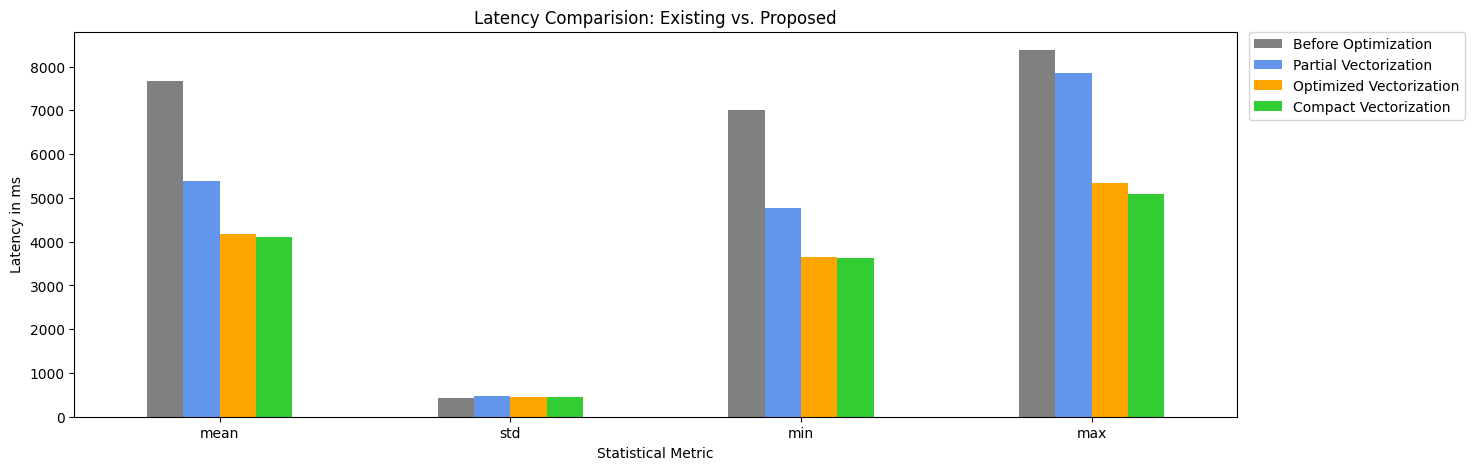

In [127]:
description.plot( figsize= (15,5), kind= "bar", color= ["gray", "cornflowerblue", "orange", "limegreen"] )

plt.title( "Latency Comparision: Existing vs. Proposed")
plt.legend( bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0. )

plt.xlabel( "Statistical Metric" )
plt.ylabel( "Latency in ms" )
plt.xticks(rotation=0)
plt.show()

## Conclusion:
From the above experiments,
</br>
it is concluded that the mean, and standard deviation for recorded latency values are minimum in Compact Vectorization.
</br></br>
Our proposed methodology **'Compact Vectorization'** optimizes latency of the existing function 'DIEM_Stat' by around **46.50%**

## END
_________________________